# K-Nearest-Neighbors
I have decided to use a KNN model which is a useful algorithm for clustering data points and grouping similar observations together. Each group, or cluster of elements may have a decision boundary to separate them. 

The following procedures will be used to guide the modeling process.

1. First I will select a dataset
2. Model Preprocessing
3. Metrics & different scoring methods
4. Meta Estimators
5. Human-Learn

## 1. Import the Necessary Libraries
Extracting the load_boston dataset from scikit-learn I will use the information about the housing data and assign the values to the X (predictor) variable. The target, or y variable will be assigned to house price values.

In [1]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing

In [2]:
cali_housing = fetch_california_housing(as_frame=True)

In [3]:
type(fetch_california_housing())

sklearn.utils.Bunch

In [4]:
dir(fetch_california_housing())

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

Looking at the description for this dataset.

In [5]:
print(cali_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Looking at the feature names for this dataset.

In [6]:
X, y = cali_housing.data, cali_housing.target
feature_names = cali_housing.feature_names

In [7]:
print(feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [8]:
cali_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
cali_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
cali_housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [11]:
X.shape

(20640, 8)

In [12]:
y.shape

(20640,)

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

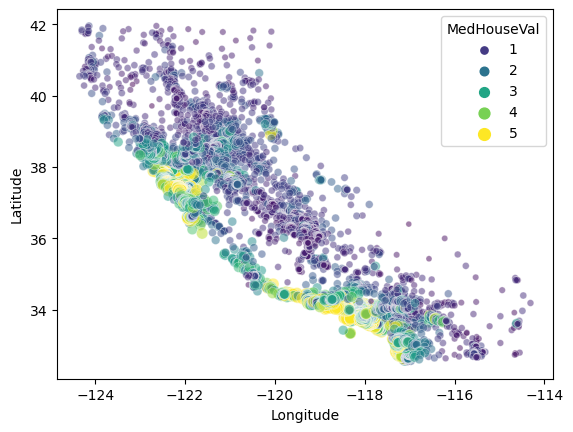

In [13]:
import seaborn as sns

sns.scatterplot(data=cali_housing.frame, x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5)

Returns an array for X which has properties and feature inputs of houses and also an array for y values based on house prices. Next, in order to view the dataset derived from sklearn first it's necessary to convert it using the dataframe constructor.

In [14]:
cali_housing = pd.DataFrame(data=np.c_[cali_housing['data'], cali_housing['target']], columns= cali_housing['feature_names'] + ['target'])

In [15]:
cali_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Preserve the dataframe as a CSV file.

In [16]:
cali_housing.to_csv(r"C:/Users/lynst/Documents/GitHub/machine-learning-projects/supervised-learning/knn/cali_housing.csv")

### Model Selection
So first an object needs to be created such as a Series, DataFrame or Dictionary. Next a model needs to be selected and trained on the existing labeled data. The model will be fit to the data so it can start to learn from it, not just memorize it. 

This particular example doesn't make use of splitting the data into training, validation or test sets just yet although this will become an integral part of the modeling process to see if it will generalize well to new, unseen data.

In [17]:
# Import model library
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

# Model Creation:
my_model = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, 
                               metric='minkowski', metric_params=None, n_jobs=None)

In [18]:
# Learning phase - or fitting the model to data
my_model.fit(X, y)

KNeighborsRegressor()

In [19]:
# Then we can make a prediction
pred_y = my_model.predict(X)

In [20]:
score = my_model.score(X,y)
print(score)

0.4711185944964351


In [21]:
mse = mean_squared_error(y, pred_y)
print("Mean Squared Error:",mse)

Mean Squared Error: 0.7042321942059601


In [22]:
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.8391854349343535
